In [2]:
 %%time
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression(random_state=0)

training = pd.read_csv('./dataset/training.csv')
test = pd.read_csv('./dataset/test.csv')

test.columns = training.columns.str.replace('result_0_1', 'icd10')
training.columns = training.columns.str.replace('result_0_1', 'icd10')

frames = [training, test]
df = pd.concat(frames).drop_duplicates()

x = df.drop(['icd10'], axis=1)
y = df[['icd10']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_pred_sc = scaler.transform(x_test)

clf.fit(x_train_sc, y_train)
y_pred = clf.predict(x_pred_sc)

cfmx = confusion_matrix(y_test,y_pred)

print(cfmx)

err = (cfmx[0,1] + cfmx[1,0]) / int(y_test.count())

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuarcy:', '{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('Precision:', '{:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall:', '{:.4f}'.format(recall_score(y_test,y_pred)))
print('F1:', '{:.4f}'.format(f1_score(y_test,y_pred)))
print('Error Rate: {:.4f}'.format(err))

[[8676  738]
 [1366 5633]]
Accuarcy: 0.8718
Precision: 0.8842
Recall: 0.8048
F1: 0.8426
Error Rate: 0.1282
CPU times: user 318 ms, sys: 67.9 ms, total: 385 ms
Wall time: 216 ms


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


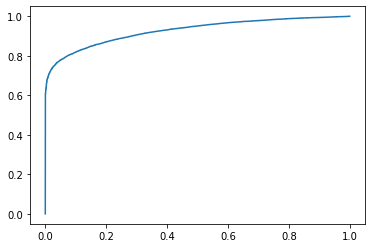

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

probs = clf.predict_proba(x_pred_sc)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.show()

In [35]:
from sklearn.preprocessing import binarize
probs = clf.predict_proba(x_pred_sc)
y_bin_th = binarize(probs, threshold=0.25)
y_pred_th = y_bin_th[:,1]
print(confusion_matrix(y_test,y_pred_th))

[[ 4133  1494]
 [ 2966 24895]]


In [47]:
y_train.loc[y_train['icd10'] == 1]

,icd10
54062,1
47214,1
20673,1
14806,1
44987,1
...,...
63515,1
51824,1
34750,1
33508,1


In [48]:
y_train.loc[y_train['icd10'] == 0]

,icd10
56422,0
48370,0
5887,0
31898,0
33708,0
...,...
59465,0
5520,0
20463,0
18638,0


In [49]:
y_test.loc[y_test['icd10'] == 1]

,icd10
31991,1
39418,1
20690,1
17229,1
55557,1
...,...
37528,1
46018,1
22409,1
2979,1


In [50]:
y_test.loc[y_test['icd10'] == 0]

,icd10
63793,0
44649,0
8830,0
56917,0
47648,0
...,...
1074,0
58822,0
13340,0
30273,0
